In [20]:
# ✅ STEP 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [21]:
# ✅ STEP 2: Load dataset
df = pd.read_csv("data.csv")

In [22]:
# ✅ STEP 3: Select proper label column
# Check which column has app names or traffic classes
print(df.columns)  # You can use 'ProtocolName', 'Label', etc.
label_col = "ProtocolName"  # Use the column that contains app categories like HTTP, DNS, etc.


Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [23]:
# ✅ STEP 4: Preview top traffic types
print(df[label_col].value_counts().head(10))


ProtocolName
GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
MICROSOFT          54710
GMAIL              40260
WINDOWS_UPDATE     34471
Name: count, dtype: int64


In [24]:
# ✅ STEP 5: Filter for top 5 traffic types and sample 1000 rows each
top_classes = df[label_col].value_counts().head(5).index.tolist()

# Filter to those classes only
df_filtered = df[df[label_col].isin(top_classes)]

# Sample 1000 rows per class
df_sampled = df_filtered.groupby(label_col).sample(n=1000, random_state=42).reset_index(drop=True)


In [25]:
# ✅ STEP 6: Prepare features and labels
labels = df_sampled[label_col]

drop_cols = ['Flow.ID', 'Source.IP', 'Destination.IP', 'Timestamp', 
             'Label', 'L7Protocol', 'ProtocolName']

X = df_sampled.drop(columns=[col for col in drop_cols if col in df_sampled.columns])
X = X.select_dtypes(include=[np.number])  # Keep numeric features only


In [26]:
# ✅ STEP 7: Handle missing values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
labels = labels.loc[X.index]  # Ensure labels and features match after cleanup


In [27]:
# ✅ STEP 8: Encode target labels
le = LabelEncoder()
y = le.fit_transform(labels)


In [28]:
# ✅ STEP 9: Train/test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# ✅ STEP 10: Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

📊 Classification Report:

              precision    recall  f1-score   support

      GOOGLE       0.66      0.48      0.55       216
        HTTP       0.81      0.83      0.82       190
HTTP_CONNECT       0.68      0.80      0.74       192
  HTTP_PROXY       0.69      0.68      0.68       210
         SSL       0.75      0.86      0.81       192

    accuracy                           0.72      1000
   macro avg       0.72      0.73      0.72      1000
weighted avg       0.72      0.72      0.72      1000



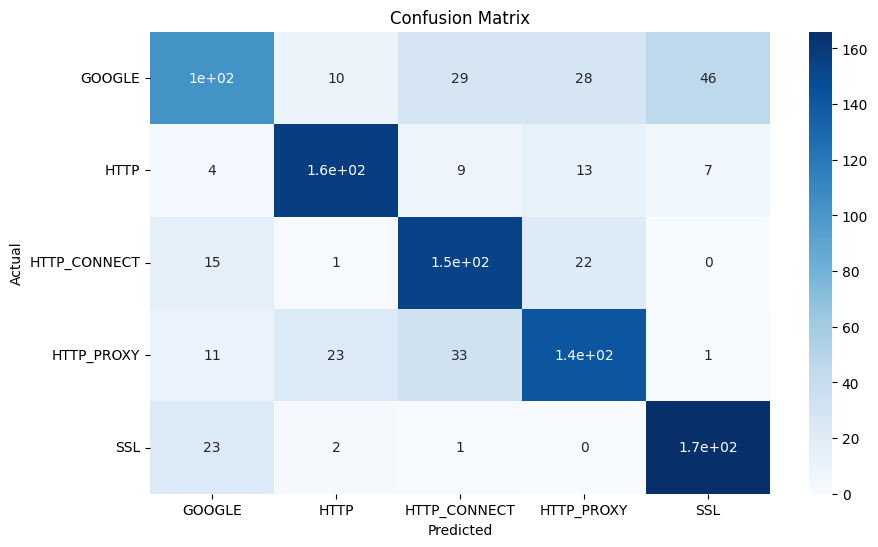

In [30]:
# ✅ STEP 11: Evaluate model
y_pred = clf.predict(X_test_scaled)

# Show classification report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
# ✅ STEP 12: Save model components (optional for deployment)
joblib.dump(clf, "model/traffic_classifier.pkl")
joblib.dump(le, "model/traffic_label_encoder.pkl")
joblib.dump(scaler, "model/traffic_scaler.pkl")


['model/traffic_scaler.pkl']